In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

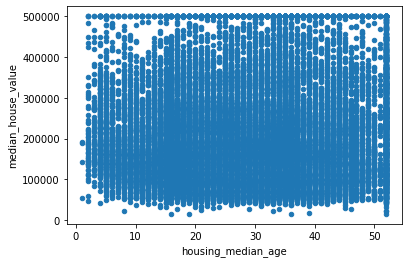

In [3]:
df.plot.scatter("housing_median_age", "median_house_value")

In [4]:
print(set(df['ocean_proximity']))
df['ocean_proximity'].unique()

{'INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'}


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
mapper = {'NEAR BAY':1,'<1H OCEAN':2,'INLAND':3,'NEAR OCEAN':4,'ISLAND':5}
df = df.replace({'ocean_proximity':mapper})
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,3
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,3
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,3


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value = np.nan,strategy='mean')
housing = imputer.fit_transform(df)
housing

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  8.3252e+00,
         4.5260e+05,  1.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  8.3014e+00,
         3.5850e+05,  1.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  7.2574e+00,
         3.5210e+05,  1.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.7000e+00,
         9.2300e+04,  3.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  1.8672e+00,
         8.4700e+04,  3.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  2.3886e+00,
         8.9400e+04,  3.0000e+00]])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.median_income,df.median_house_value,test_size=0.3)

In [9]:
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [10]:
Y_pred = model.predict(np.array(X_test).reshape(-1,1))


In [11]:
import matplotlib.pyplot as plt

In [12]:
res = Y_pred - y_test

(array([   6.,   44.,   96.,  255.,  587., 1444., 2675., 1023.,   57.,
           5.]),
 array([-433504.67730106, -361551.32282715, -289597.96835324,
        -217644.61387933, -145691.25940542,  -73737.90493151,
          -1784.5504576 ,   70168.8040163 ,  142122.15849021,
         214075.51296412,  286028.86743803]),
 <BarContainer object of 10 artists>)

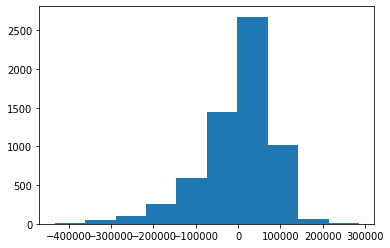

In [13]:
plt.hist(res)

In [14]:
mse = mean_squared_error(y_test,Y_pred)**0.5

In [15]:
print(mse)

83470.9068964268


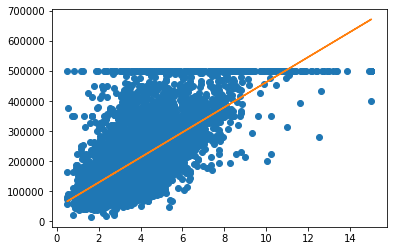

In [16]:
plt.plot(X_test,y_test,'o')
m, b = np.polyfit(X_test,Y_pred,1)
plt.plot(X_test, m*X_test + b)
plt.show()